In [5]:
import pandas as pd

# grade
df_1 = pd.read_csv("bks_cjxx_out1.csv",sep = ",", encoding = 'utf8')
df_1 = df_1[['xh','kccj']]
df_1 = df_1.groupby(by='xh').mean()
df_1 = df_1.drop(df_1[df_1.kccj > 100].index)
# print(df_1)
df_1.to_csv('grade.csv',encoding='utf-8')

In [6]:
import pandas as pd

df_2 = pd.read_csv("tsjyygh.txt",sep = ";", encoding = 'utf8')

df_2=df_2['jyr'].value_counts()
df_2.to_csv('bookcount.csv',encoding='utf-8')

df = pd.read_csv("bookcount.csv",names=['xh','count'], encoding = 'utf8')
df= df.groupby(by='xh').sum()

df=df[:-4]
# print(df)
df.to_csv('bookcount.csv',encoding='utf-8')

D:\Python\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [7]:
import pandas as pd

df_3 = pd.read_csv("bookcount.csv", encoding = 'utf8')
df_4 = pd.read_csv("grade.csv",encoding = 'utf8')

df_3.astype(int)
result=pd.merge(df_3,df_4)

# print(result)
result.to_csv('bookgrade.csv', index=False,encoding='utf-8')


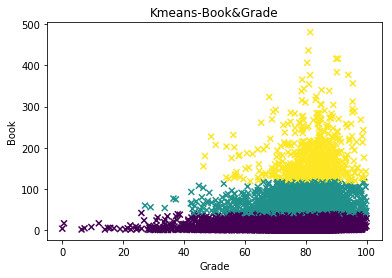

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("bookgrade.csv", encoding = 'utf8')
df=df[['count','kccj']]
df = df.drop(df[df['count'] > 500].index)
X=list(zip(df['kccj'],df['count']))

# Kmeans
clf = KMeans(n_clusters=3)
y_pred = clf.fit_predict(X)

x = [n[0] for n in X]
y = [n[1] for n in X]

plt.scatter(x, y, c=y_pred, marker='x')
plt.title("Kmeans-Book&Grade")
plt.xlabel("Grade")
plt.ylabel("Book")
plt.show()